Stroke Prediction with Logistic Regression

In [33]:
# import lines
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Read in csv
df = pd.read_csv("stroke_dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
categorical_columns = list(df.select_dtypes(include=['object']).columns)
for column in categorical_columns:
    print("{}:".format(column), df[column].unique())
# all categorical columns dont have too many categories, thus no need for grouping


gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Data Exploration

In [38]:
# target is binary, 1 for yes 0 for no
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot: xlabel='stroke', ylabel='count'>

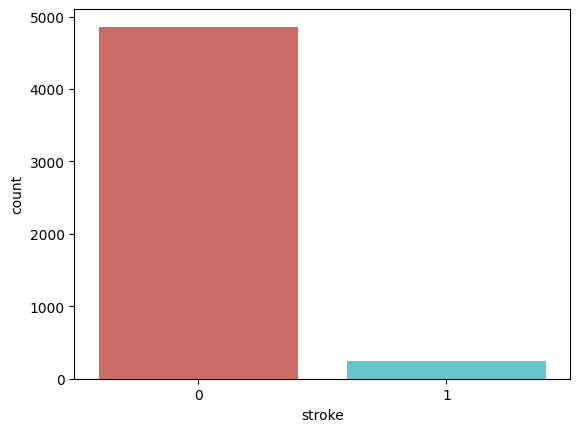

In [5]:
sns.countplot(x = "stroke", data = df, palette="hls")
# classes are wildly imbalanced, no stroke:stroke is large
# first do more exploration

In [6]:
# get categorical means for target
df.groupby("stroke").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064
1,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292


In [7]:
''' 
Average age of people who got a stroke is higher than average age of people who did not get a stroke -> could be good predictor
People who got strokes were more likely to have hypertension than that of people who did not get strokes ---> could be good predictor
People who got strokes were also more likely to have heart disease than that of people who did not get strokes--> could be good predictor
avg glucose level of stroke patients higher than that of healthy people --> could be good predictor
bmi is only slightly higher for stroke patients --> likely ambiguous

conclusion: bmi likely is not a good predictor for stroke likelihood

'''

' \nAverage age of people who got a stroke is higher than average age of people who did not get a stroke -> could be good predictor\nPeople who got strokes were more likely to have hypertension than that of people who did not get strokes ---> could be good predictor\nPeople who got strokes were also more likely to have heart disease than that of people who did not get strokes--> could be good predictor\navg glucose level of stroke patients higher than that of healthy people --> could be good predictor\nbmi is only slightly higher for stroke patients --> likely ambiguous\n\nconclusion: bmi likely is not a good predictor for stroke likelihood\n\n'

In [8]:
# now get categorical means for all other categorical variables for further data analysis
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [9]:
df.groupby("gender").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
Female,36479.685037,43.757395,0.092184,0.037742,104.057809,29.065758,0.047094
Male,36562.541371,42.483385,0.104965,0.077069,109.088520,28.647936,0.051064
Other,56156.000000,26.000000,0.000000,0.000000,143.330000,22.400000,0.000000


In [10]:

# Gender has little no effect on stroke likelihood, all other categorical variables are also similar, therefore likely bad predictor.


In [11]:
df.groupby("ever_married").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
ever_married,,,,,,,
No,36117.673307,22.014229,0.030165,0.018213,96.44815,25.214721,0.016505
Yes,36727.514465,54.342082,0.132717,0.072771,111.23031,30.850749,0.065613


In [12]:
# Being married seems to increase stroke likelihood by around 80%, all of the other "good" predictors also increase correspondingly therefore could be entirely coincidental

In [13]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [14]:
df.groupby("work_type").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
work_type,,,,,,,
Govt_job,36516.936073,50.879756,0.111111,0.054795,107.779772,30.522063,0.050228
Never_worked,38274.409091,16.181818,0.000000,0.000000,96.042727,25.545455,0.000000
Private,36951.227009,45.503932,0.096068,0.054017,106.796844,30.304625,0.050940
Self-employed,35551.288156,60.201465,0.175824,0.098901,112.645446,30.211871,0.079365
children,35769.432314,6.841339,0.000000,0.001456,94.400277,20.038003,0.002911


In [15]:
# work type overall does not seem like a good predictor

In [16]:
df.groupby("Residence_type").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
Residence_type,,,,,,,
Rural,36547.998011,42.900811,0.099841,0.053302,106.375235,28.894212,0.045346
Urban,36488.613636,43.542126,0.095146,0.054700,105.927307,28.892289,0.052003


In [17]:
# bad predictor

In [18]:
df.groupby("smoking_status").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,
Unknown,35899.042098,30.229922,0.033679,0.031088,99.601541,25.666352,0.030440
formerly smoked,36878.981921,54.929944,0.135593,0.087006,112.886079,30.747192,0.079096
never smoked,36833.141649,46.744715,0.122622,0.047569,107.558092,29.982559,0.047569
smokes,36567.533587,47.096324,0.119138,0.077313,108.017440,30.543555,0.053232


In [37]:
# people who have formerly smoked, likely to have stroke, same with people who currently smoke

In [30]:
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Data Visualizations

Text(0.5, 1.0, 'Stroke Likelihood given Smoking Status')

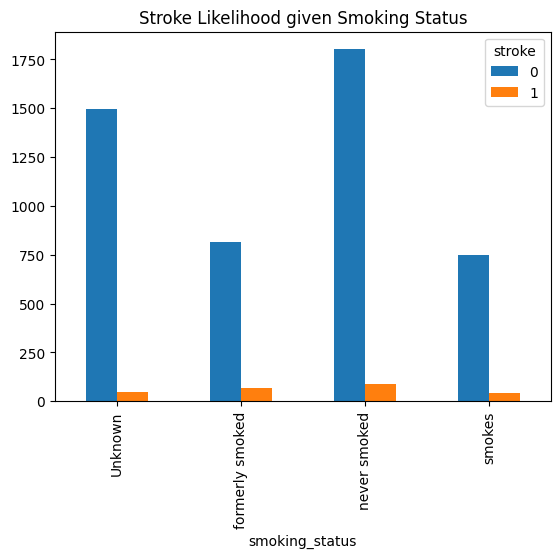

In [34]:
pd.crosstab(df.smoking_status, df.stroke).plot(kind="bar")
plt.title("Stroke Likelihood given Smoking Status")

In [ ]:
# people who have formerly smoked wayy more likely to get stroke, stroke bars are similar only because of range, less people in dataset had formerly smoked

Text(0.5, 1.0, 'Stroke Likelihood given Marriage Status')

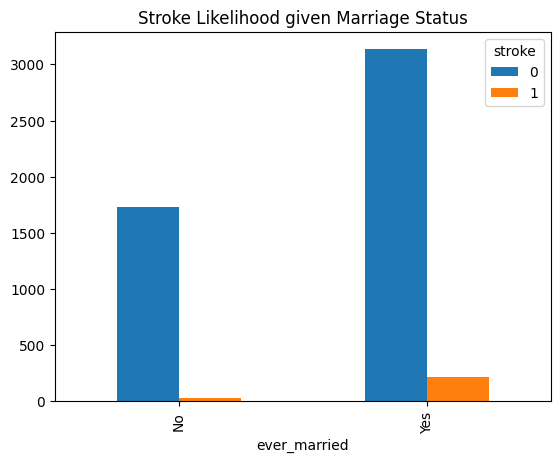

In [35]:
pd.crosstab(df.ever_married, df.stroke).plot(kind="bar")
plt.title("Stroke Likelihood given Marriage Status")

In [39]:
# bar graph once again shows that marriage status will be a good predictor for stroke likelihood